In [1]:
!pip install brokenaxes

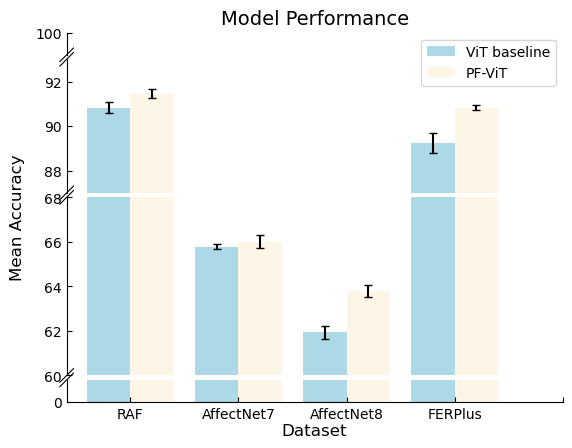

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from brokenaxes import brokenaxes
import warnings

warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


# create data
data = pd.DataFrame({
    'Dataset': ['RAF', 'AffectNet7', 'AffectNet8', 'FERPlus'],
    'ViT baseline Accuracy': [90.83, 65.79, 61.93, 89.23],
    'PF-ViT Accuracy': [91.46, 66.01, 63.80, 90.83],
    'ViT baseline Std': [0.25, 0.12, 0.29, 0.45],
    'PF-ViT Std': [0.20, 0.28, 0.26, 0.13]
})

# create broken axes plot
bax = brokenaxes(ylims=((0, 1), (60, 68), (87, 93), (99, 100)), hspace=0.05)

# create bar plots
x = np.array([0, 1, 2, 3])
bax.bar(x-0.2, data['ViT baseline Accuracy'], width=0.4, color='lightblue', label='ViT baseline')
bax.bar(x+0.2, data['PF-ViT Accuracy'], width=0.4, color='oldlace', label='PF-ViT')

# create std lines
bax.errorbar(x-0.2, data['ViT baseline Accuracy'], yerr=data['ViT baseline Std'], fmt='none',
             color='black', alpha=1, elinewidth=1.5, capsize=3)
bax.errorbar(x+0.2, data['PF-ViT Accuracy'], yerr=data['PF-ViT Std'], fmt='none',
             color='black', alpha=1, elinewidth=1.5, capsize=3)

# set axis labels and title
bax.set_xlabel('Dataset', fontsize=12)
bax.set_ylabel('Mean Accuracy', fontsize=12)
bax.set_title('Model Performance', fontsize=14)

# remove grid lines
bax.grid(False)

# set edge color and tick parameters

bax.tick_params(axis='both', direction='in')

# set x-tick labels
x_ticks = np.arange(len(data['Dataset']) + 1)
x_ticklabels = ['','RAF', 'AffectNet7', 'AffectNet8', 'FERPlus']
bax.set_xticks(x_ticks)
bax.set_xticklabels(x_ticklabels, rotation=0, fontsize=10)

# set legend
bax.legend(fontsize=10)

# # add labels on bars
# for i, v1, v2 in zip(x, data['ViT baseline Accuracy'], data['PF-ViT Accuracy']):
#     bax.text(i-0.2, v1-0.05, str(v1), color='black', ha='center', fontsize=10)
#     bax.text(i+0.2, v2-0.05, str(v2), color='black', ha='center', fontsize=10)

# adjust figure size and resolution
fig = plt.gcf()
# fig.set_size_inches(15, 16)
# fig.set_dpi(200)

# show plot
plt.show()


plt.savefig('figure_mean.png', dpi=200)